In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import os
import matplotlib as mpl
if os.environ.get('DISPLAY', '') == '':
    print('no display found. Using non-interactive Agg backend')
    mpl.use('Agg')
import future.utils
mpl.rcParams["text.usetex"] = False
sns.set_style("whitegrid")
sns.axes_style("whitegrid")
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
import json
import numpy as np


no display found. Using non-interactive Agg backend


In [2]:
def from_res_to_iterations(name, nr):
    iterations = []
    res = open(f"res/{name} nr{nr}.csv", "r")
    i = 0
    for line in res.readlines():
        d = dict()
        d['iteration'] = i
        d['status'] = {}
        j = 0
        for el in line.split(','):
            d['status'][j] = float(el)
            j+=1
        i += 1
        iterations.append(d)
    return iterations

name = "media mo[0.05, 0.5, 0.95] p0.1 e0.4 g1.25 gm1.25 mi1000000"
its = from_res_to_iterations(name, 1)

In [3]:
def evolution(iterations, fig, ax):

    """
    Generates the plot

    :param filename: Output filename
    :param percentile: The percentile for the trend variance area
    """

    nodes2opinions = {}
    node2col = {}

    last_it = iterations[-1]['iteration'] + 1
    last_seen = {}

    for it in iterations:
        sts = it['status']
        its = it['iteration']
        for n, v in sts.items():
            if n in nodes2opinions:
                last_id = last_seen[n]
                last_value = nodes2opinions[n][last_id]

                for i in range(last_id, its):
                    nodes2opinions[n][i] = last_value

                nodes2opinions[n][its] = v
                last_seen[n] = its
            else:
                nodes2opinions[n] = [0]*last_it
                nodes2opinions[n][its] = v
                last_seen[n] = 0
                if v < 0.33:
                    node2col[n] = '#3776ab'
                elif 0.33 <= v <= 0.66:
                    node2col[n] = '#FFA500'
                else:
                    node2col[n] = '#FF0000'

    mx = 0
    for k, l in future.utils.iteritems(nodes2opinions):
        if mx < last_seen[k]:
            mx = last_seen[k]
        x = list(range(0, last_seen[k]))
        y = l[0:last_seen[k]]
        ax.plot(x, y, lw=1, alpha=0.5, color=node2col[k])
    
    ax.set_ylim(-0.1, 1.1)
    ax.tick_params(axis='both', which='major', labelsize=4, pad=0)                
    # plt.grid(axis = 'both', which='both')
    plt.tight_layout()


def finaldistribution(name, nr, ax):
    jsonfile = open(f'aggregate/final_opinions {name}.json')
    data = json.load(jsonfile)
    finalops = list(data[str(nr)])
    x = [i for i in range(100)]
    y = sorted(finalops)    
    node2col = {}
    for node in x:
        if y[node] < 0.33:
            node2col[node] = '#3776ab'
        elif 0.33 <= y[node] <= 0.66:
            node2col[node] = '#FFA500'
        else:
            node2col[node] = '#FF0000'
    for node in x:
        ax.scatter(x[node], y[node], s = 0.1, c = node2col[node])
    ax.set_ylim(-0.1, 1.1)
    ax.tick_params(axis='both', which='major', labelsize=3, pad=2)                
    plt.grid(axis = 'both', which='both')
    plt.tight_layout()

In [4]:
from tqdm import tqdm
def spaghettigridbyp(mo):
    plist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    elist = [0.2, 0.3, 0.4, 0.5, 1.0]
    glist = [0.0, 0.5, 0.75, 1.0, 1.25, 1.5]
    for p in plist:
        with tqdm(total=len(elist)*len(glist)) as pbar:
            fig, axes = plt.subplots(nrows=len(elist), ncols=len(glist), figsize=(len(glist), len(elist)), dpi=600, sharey=True)
            row=0
            for e in elist:
                col=0
                for g in glist: 
                    name = f'media mo{mo} p{p} e{e} g{g} gm{g} mi1000000'
                    nr = 1
                    iterations = from_res_to_iterations(name, nr)
                    evolution(iterations, fig=fig, ax=axes[row,col])
                    axes[row,col].set_xlabel(r"$\gamma$ = {}".format(g))
                    axes[row,col].set_ylabel(r"$\epsilon$ = {}".format(e))
                    axes[row,col].set_title("p={}".format(p))
                    col+=1
                    pbar.update(1)
                row+=1
            name = f'media mo{mo} p{p}'
            plt.savefig(f"plots/aggregate/evolutiongrid {name}.png")
            plt.close()

def spaghettigridbye(mo):
    plist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    elist = [0.2, 0.3, 0.4, 0.5, 1.0]
    glist = [0.0, 0.5, 0.75, 1.0, 1.25, 1.5]
    for e in elist:
        with tqdm(total=len(plist)*len(glist)) as pbar:
            fig, axes = plt.subplots(nrows=len(plist), ncols=len(glist), figsize=(len(glist), len(plist)), dpi=600, sharey=True)
            row=0
            for p in plist:
                col=0
                for g in glist: 
                    name = f'media mo{mo} p{p} e{e} g{g} gm{g} mi1000000'
                    nr = 1
                    iterations = from_res_to_iterations(name, nr)
                    evolution(iterations, fig=fig, ax=axes[row,col])
                    col+=1
                    pbar.update(1)
                row+=1
            name = f'media mo{mo} e{e}'
            plt.savefig(f"plots/aggregate/evolutiongrid {name}.png")
            plt.close()

In [5]:
def finaldistributiongridbye(mo):
    plist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    elist = [0.2, 0.3, 0.4, 0.5, 1.0]
    glist = [0.0, 0.5, 0.75, 1.0, 1.25, 1.5]
    for e in elist:
        with tqdm(total=len(plist)*len(glist)) as pbar:
            fig, axes = plt.subplots(nrows=len(plist), ncols=len(glist), figsize=(len(glist), len(plist)), dpi=600, sharey=True)
            row=0
            for p in plist:
                col=0
                for g in glist: 
                    name = f'media mo{mo} p{p} e{e} g{g} gm{g} mi1000000'
                    finaldistribution(name, 1, axes[row, col])
                    col+=1
                    pbar.update(1)
                row+=1
            name = f'media mo{mo} e{e}'
            plt.savefig(f"plots/aggregate/distributiongrid {name}.png")
            plt.close()

def finaldistributiongridbyp(mo):
    plist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    elist = [0.2, 0.3, 0.4, 0.5, 1.0]
    glist = [0.0, 0.5, 0.75, 1.0, 1.25, 1.5]
    for p in plist:
        with tqdm(total=len(elist)*len(glist)) as pbar:
            fig, axes = plt.subplots(nrows=len(elist), ncols=len(glist), figsize=(len(glist), len(elist)), dpi=600, sharey=True)
            row=0
            for e in elist:
                col=0
                for g in glist: 
                    name = f'media mo{mo} p{p} e{e} g{g} gm{g} mi1000000'
                    finaldistribution(name, 1, axes[row, col])
                    col+=1
                    pbar.update(1)
                row+=1
            name = f'media mo{mo} p{p}'
            plt.savefig(f"plots/aggregate/distributiongrid {name}.png")
            plt.close()

In [6]:
results = pd.read_csv("aggregate/aggregate_results_final_final_final.csv", index_col=[0])
results = results[results['eps']!=0.1]
results = results[results['eps']!=1.0]
onemedia = results.loc[results['media_op']=="0.0"]
threemedia = results.loc[results['media_op']=='0.05;0.5;0.95']
nobias = results[results['gam']==0.0]

In [7]:
#rifare i plot dal fisso e mettere le label in latex per paper
def heatmapsplot(results, measure, x, y, grouping):

    params = ['p_media', 'gam', 'gam_media', 'eps']
    paramsnames = ['p', '$\gamma$', '$\gamma_{media}$', '$\epsilon$']
    parmapping = dict(zip(params, paramsnames))

    sns.set_style("whitegrid")
    # sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    sns.set(font_scale=0.4)

    # mpl.rcParams["text.usetex"] = True
    # plt.rc('font',weight='bold',**{'family':'serif', 'size':6, 'serif':['Computer Modern Roman']})
    values_to_plot = sorted(list(results[grouping].unique()))
    nrows = int(len(values_to_plot)/2)
    ncols = int(len(values_to_plot)/nrows)
    with sns.axes_style("whitegrid"):

        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows*2, ncols*2), dpi=600)
        fmt = ".2f"
        annot = True
        if measure=='avg_niter':
            fmt = ".0f"
        i = 0
        j = 0
        for val in values_to_plot:
            data = results[results[grouping] == val]
            df = data.pivot(x, y, measure)
            a=sns.heatmap(df, vmin=min(results[measure]), vmax=max(results[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, ax= axes[j, i])
            a.set_yticklabels(a.get_yticklabels(), rotation = 0)
            a.set_xticklabels(a.get_xticklabels(), rotation = 0)
            axes[j, i].set_title('{}={}'.format(parmapping[grouping], val), fontsize=5)

            i+=1
            if i % ncols == 0:
                j += 1
                i=0

        for ax in axes.flat:
            ax.set_ylabel('')
            ax.set_xlabel('')
            # ax.set_xlabel(r'{}'.format(parmapping[y]), fontsize=10, labelpad=1)
            ax.tick_params(axis='x', which='major', pad=-2)
            ax.tick_params(axis='y', which='major', pad=-2)

        fig.text(0.00, 0.5, r'{}'.format(parmapping[x]), va='center', rotation='vertical', fontsize=8)
        fig.text(0.5, 0.0, r'{}'.format(parmapping[y]), va='center', rotation='horizontal', fontsize=8)

        # fig.text(0.18, -0.03, r"(a) $p=0.1$", ha='center', fontsize=10)
        # fig.text(0.51, -0.03, r"(b) $p=0.3$", ha='center', fontsize=10)
        # fig.text(0.83, -0.03, r"(c) $p=0.5$", ha='center', fontsize=10)

        cax = fig.add_axes([1.0, 0.3, 0.01, 0.6])
        cbar = fig.colorbar(a.get_children()[0], cax=cax, orientation="vertical")
        cbar.outline.set_visible(False)

        for t in cbar.ax.get_yticklabels():
            t.set_fontsize(10)
        # plt.tight_layout()    
        plt.savefig("plots/aggregate/hm media mo{} {} groupedby_{}.png".format(list(results.media_op.unique())[0], measure, grouping))

#rifare i plot dal fisso e mettere le label in latex per paper
def heatmapsplot2(results, measure, x, y, grouping):
    params = ['p_media', 'gam', 'gam_media', 'eps']
    paramsnames = ['p', '$\gamma$', '$\gamma_{media}$', '$\epsilon$']
    parmapping = dict(zip(params, paramsnames))

    sns.set_style("whitegrid")
    # sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    sns.set(font_scale=0.4)

    # mpl.rcParams["text.usetex"] = True
    # plt.rc('font',weight='bold',**{'family':'serif', 'size':6, 'serif':['Computer Modern Roman']})
    values_to_plot = sorted(list(results[grouping].unique()))
    with sns.axes_style("whitegrid"):

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3), dpi=600)
        fmt = ".2f"
        annot = True
        if measure=='avg_niter':
            fmt = ".0f"
        i = 0
        j = 0
        for val in values_to_plot:
            data = results[results[grouping] == val]
            df = data.pivot(x, y, measure)
            a=sns.heatmap(df, vmin=min(results[measure]), vmax=max(results[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, ax= axes[i])
            a.set_yticklabels(a.get_yticklabels(), rotation = 0)
            a.set_xticklabels(a.get_xticklabels(), rotation = 0)
            i+=1

        for ax in axes.flat:
            ax.tick_params(axis='x', which='major', pad=-2)
            ax.tick_params(axis='y', which='major', pad=-2)

        cax = fig.add_axes([1.0, 0.3, 0.01, 0.6])
        cbar = fig.colorbar(a.get_children()[0], cax=cax, orientation="vertical")
        cbar.outline.set_visible(False)

        for t in cbar.ax.get_yticklabels():
            t.set_fontsize(10)
        # plt.tight_layout()    
        plt.savefig("plots/aggregate/hm media nobias mo{} {} groupedby_{}.png".format(list(results.media_op.unique())[0], measure, grouping))

In [8]:
#va aggiustata la posizione della colorbar
def trisurfplot(data, p):
    params = ['p_media', 'gam', 'gam_media', 'eps']
    paramsnames = ['p', '$\gamma$', '$\gamma_{media}$', '$\epsilon$']
    parmapping = dict(zip(params, paramsnames))
    with sns.axes_style("whitegrid"):
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.1), dpi=600, subplot_kw={'projection': '3d'})
        data = data[data['p_media'] == p]
        i=0
        for measure in ['avg_ncluster', '0.0001MS_avg_ncluster', '100B_avg_entr']:
            x='eps'
            y='gam'
            ax = axes[i]        
            ax.tick_params(axis='x', which='major', labelsize = 3, pad=-6, labelrotation=45)
            ax.set_xticks(list(data['eps'].unique()))
            ax.tick_params(axis='y', which='major', pad=-3, labelrotation=-35)
            ax.set_yticks(list(data['gam'].unique()))
            ax.tick_params(axis='z', which='major', pad=0) 
            ax.set_title('p={}'.format(p), fontsize=5)
            ax.set_ylabel(r'{}'.format(parmapping[y]), labelpad=-4)
            ax.set_xlabel(r'{}'.format(parmapping[x]), labelpad=-10)
            ax.margins(x=0.1, tight=True)
            surf = ax.plot_trisurf(data[x], data[y], data[measure], cmap=plt.get_cmap('RdBu_r'), linewidth=0.2)
            i += 1
        plt.savefig("plots/aggregate/trisurf media mo{} p{}.png".format(list(results.media_op.unique())[0], p))
        # cax = fig.add_axes([1.0, 0.3, 0.01, 0.6])
        # cb = fig.colorbar(surf, cax=cax, shrink=0.5, aspect=50, orientation = 'vertical', pad=0.05)
        # cb.outline.set_visible(False)
        # cb.ax.tick_params()
        # plt.show()



In [9]:
ps = list(results.p_media.unique())
# measures = ['avg_pwdist', 
#        'avg_niter', 'new_avg_ncluster', 
#        '0.01MS_avg_ncluster', '10B_avg_entr',
#        '100B_avg_entr', 'perc_00', 'perc_05',
#        'perc_095', 'avg_opinion', 'median_opinion']
measures = ['perc_005']
# measure_titles = ['Average number of clusters', 'Average pairwise distance', 'Average number of iterations']
# titlemapping = dict(zip(measures, measure_titles))
params = ['p', 'gamma', 'gamma_media', 'epsilon']
paramsnames = [r'p', r'$\gamma$', r'$\gamma_{media}$', r'$\epsilon$']
parmapping = dict(zip(params, paramsnames))

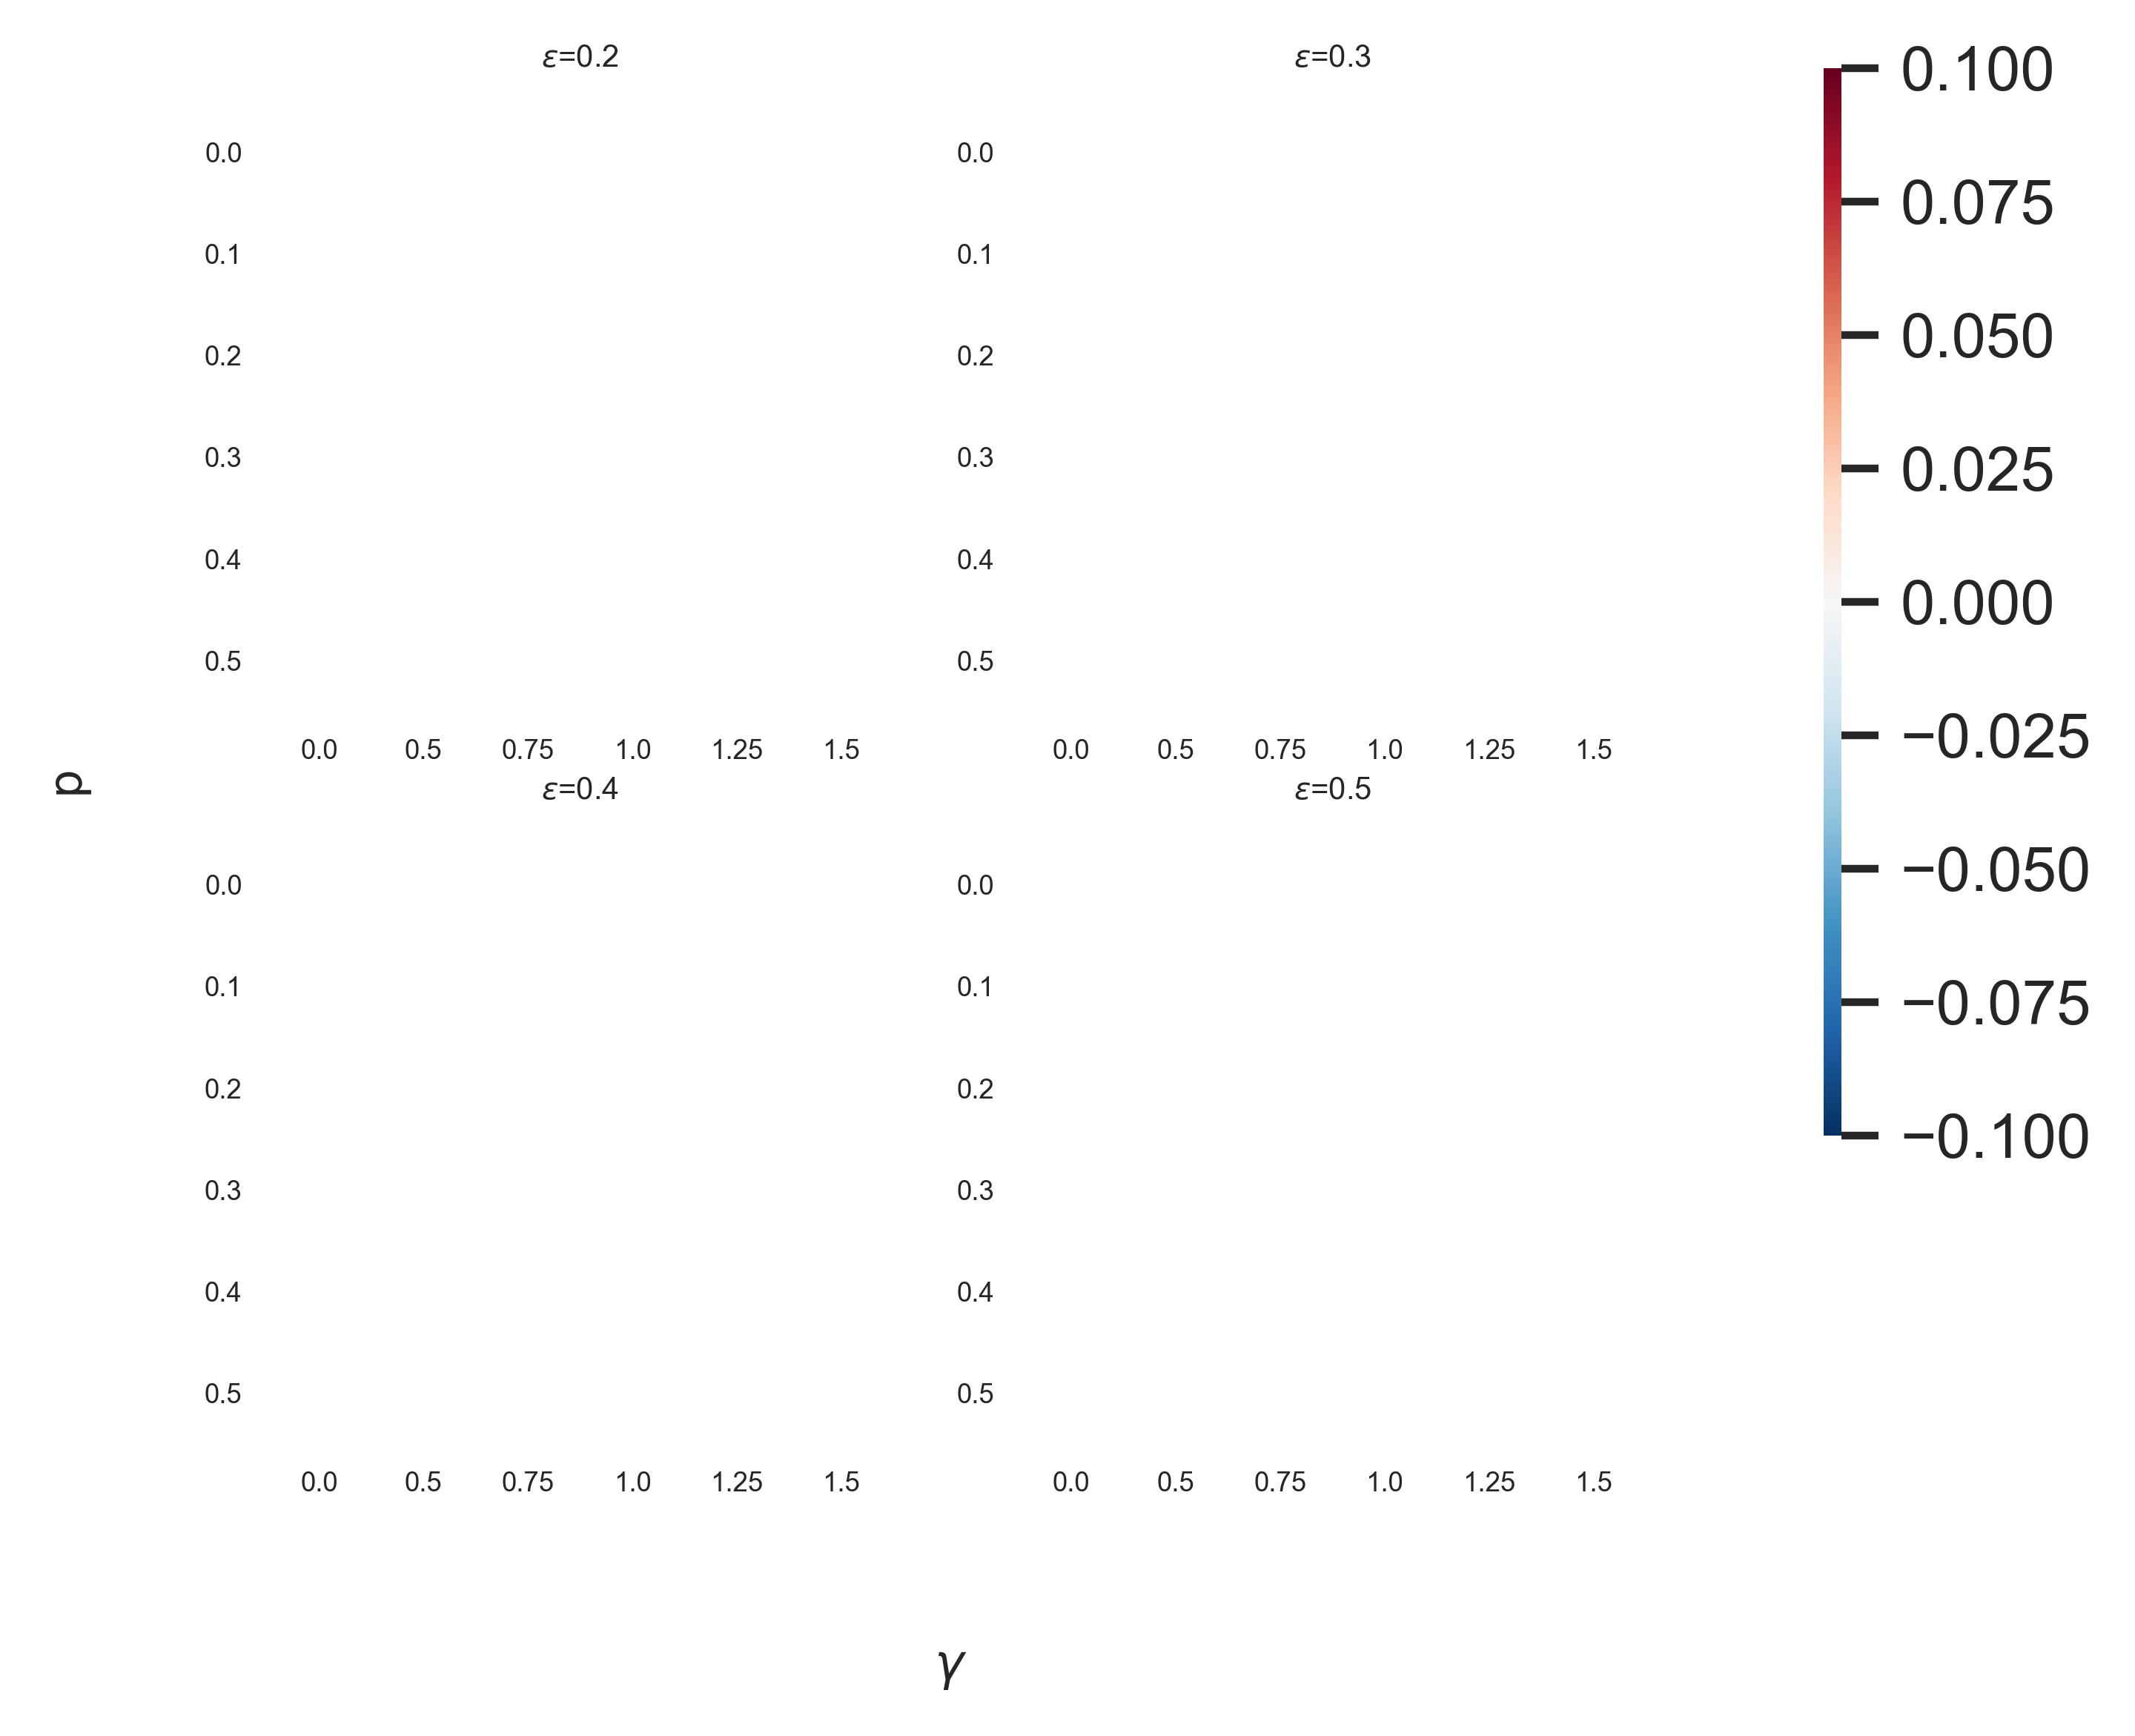

In [10]:
for measure in measures:
    # heatmapsplot(onemedia, measure, "eps", "gam", "p_media")
    heatmapsplot(onemedia, measure, "p_media", "gam", "eps")
# for p in sorted(list(onemedia.p_media.unique())):
#     trisurfplot(onemedia, p)

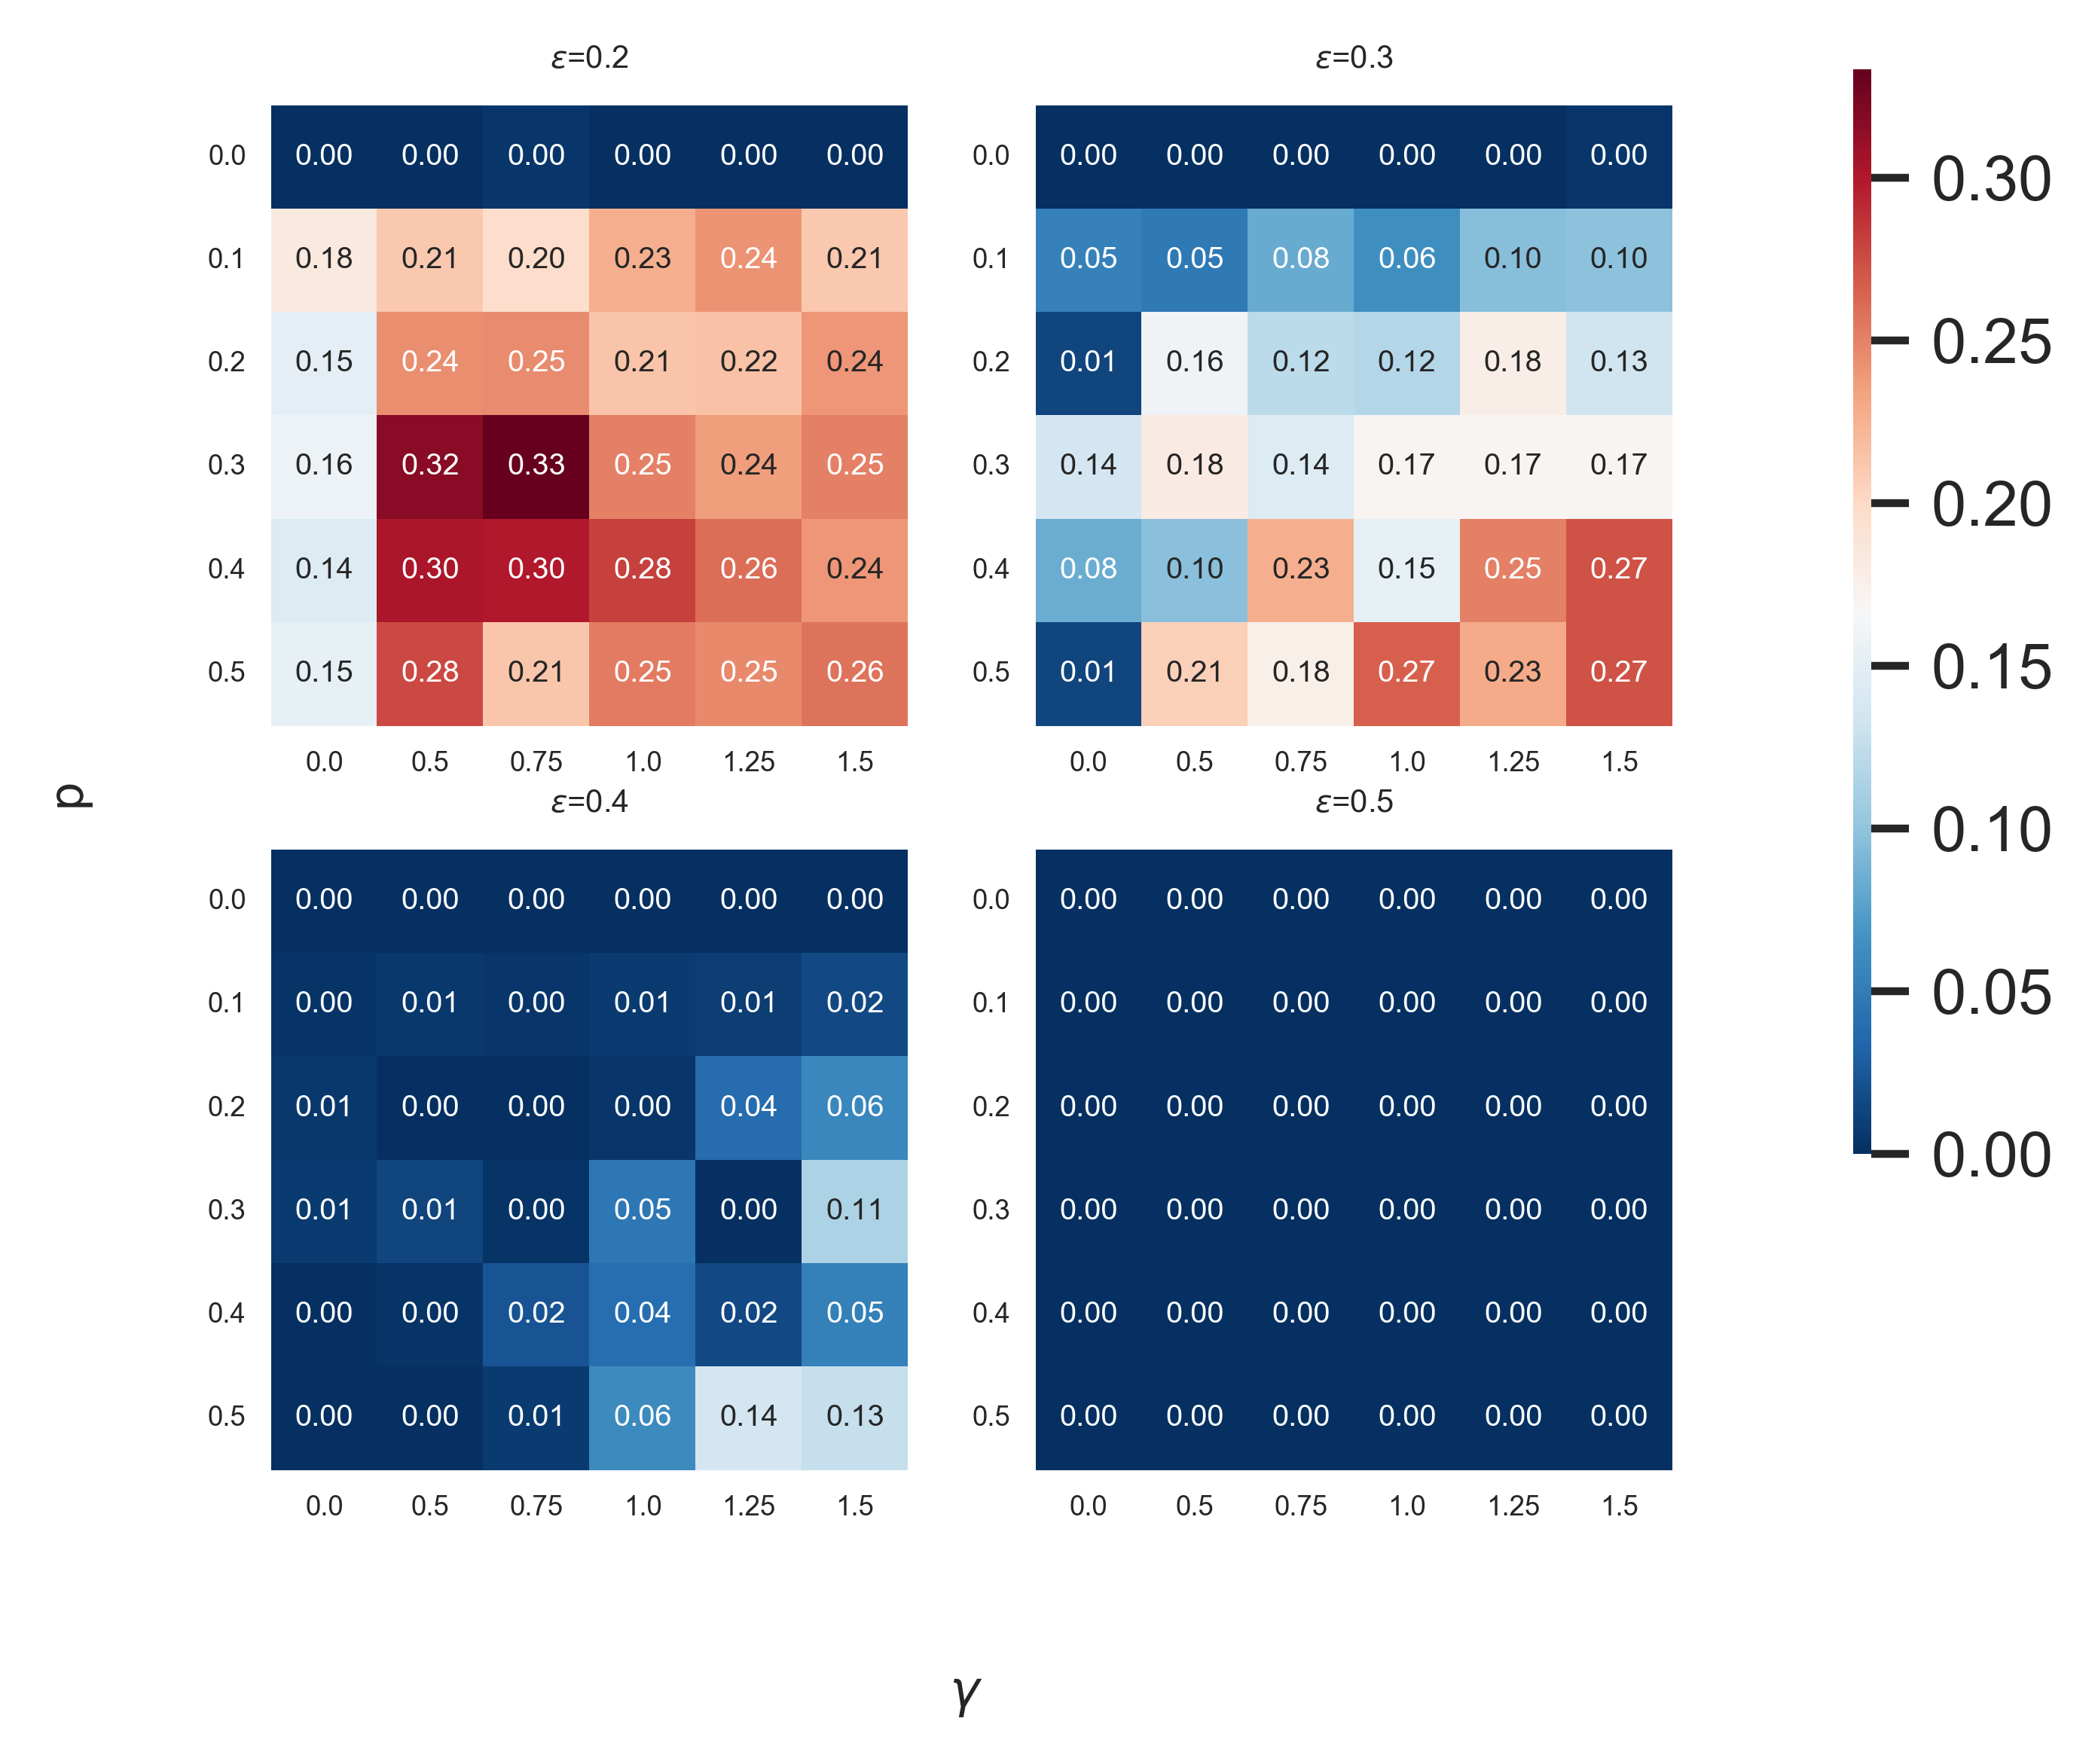

In [11]:
for measure in measures:
    # heatmapsplot(threemedia, measure, "eps", "gam", "p_media")
    heatmapsplot(threemedia, measure, "p_media", "gam", "eps")
# for p in sorted(list(threemedia.p_media.unique())):
#     trisurfplot(threemedia, p)

In [13]:
spaghettigridbye('[0.0]')
# spaghettigridbyp("[0.0]")
# finaldistributiongridbyp('[0.05, 0.5, 0.95]')
finaldistributiongridbye('[0.05, 0.5, 0.95]')

100%|██████████| 36/36 [01:39<00:00,  2.77s/it]


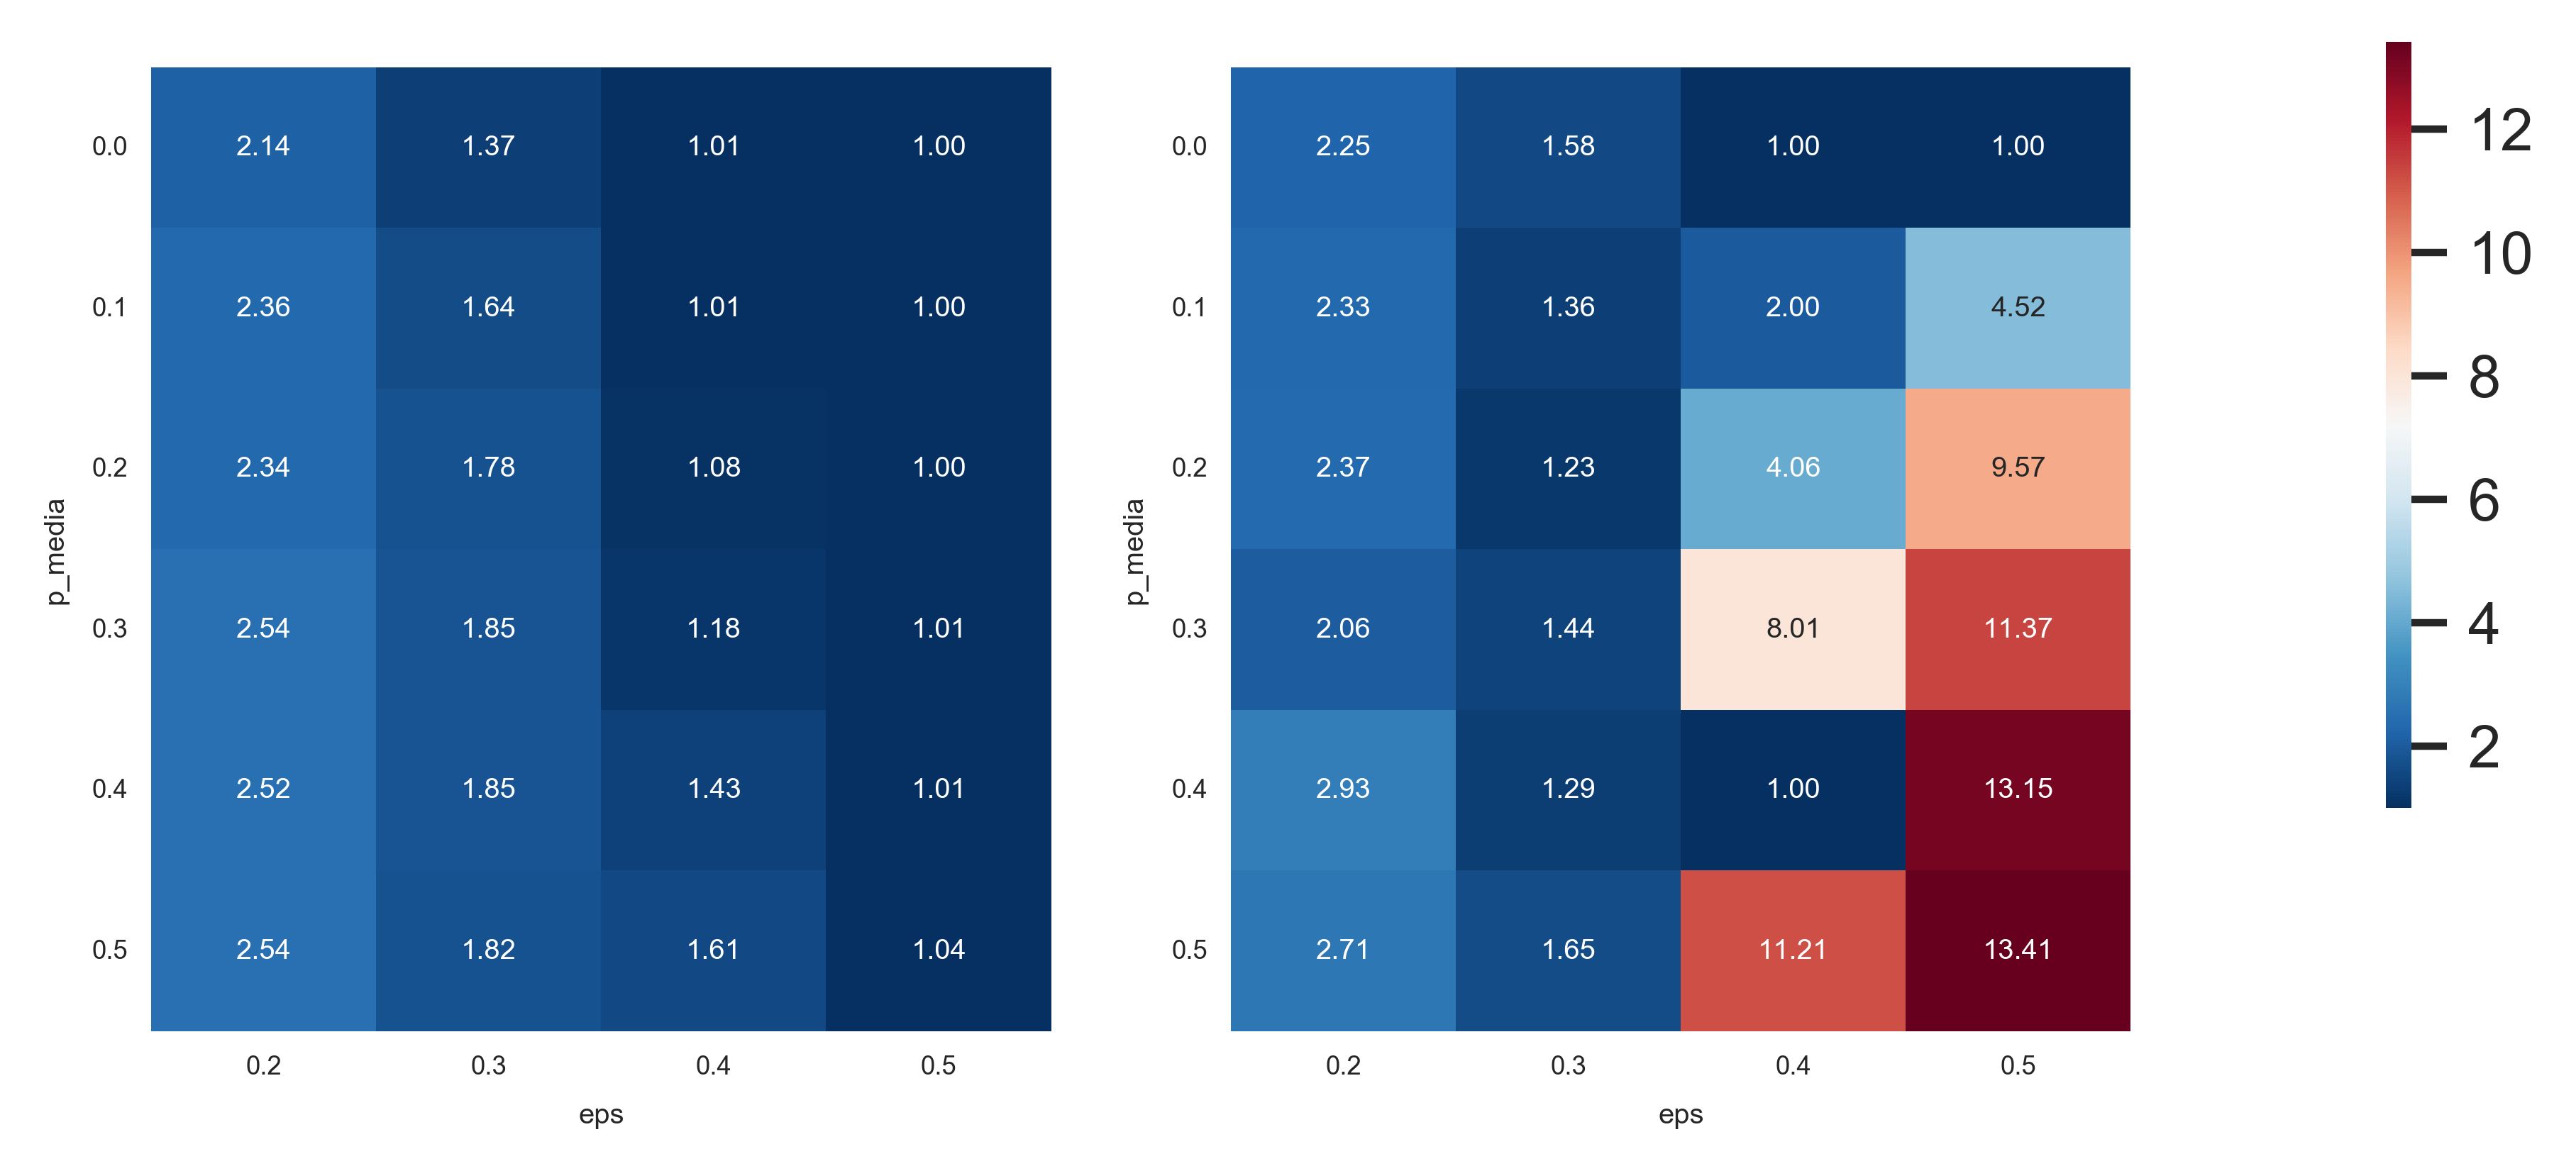

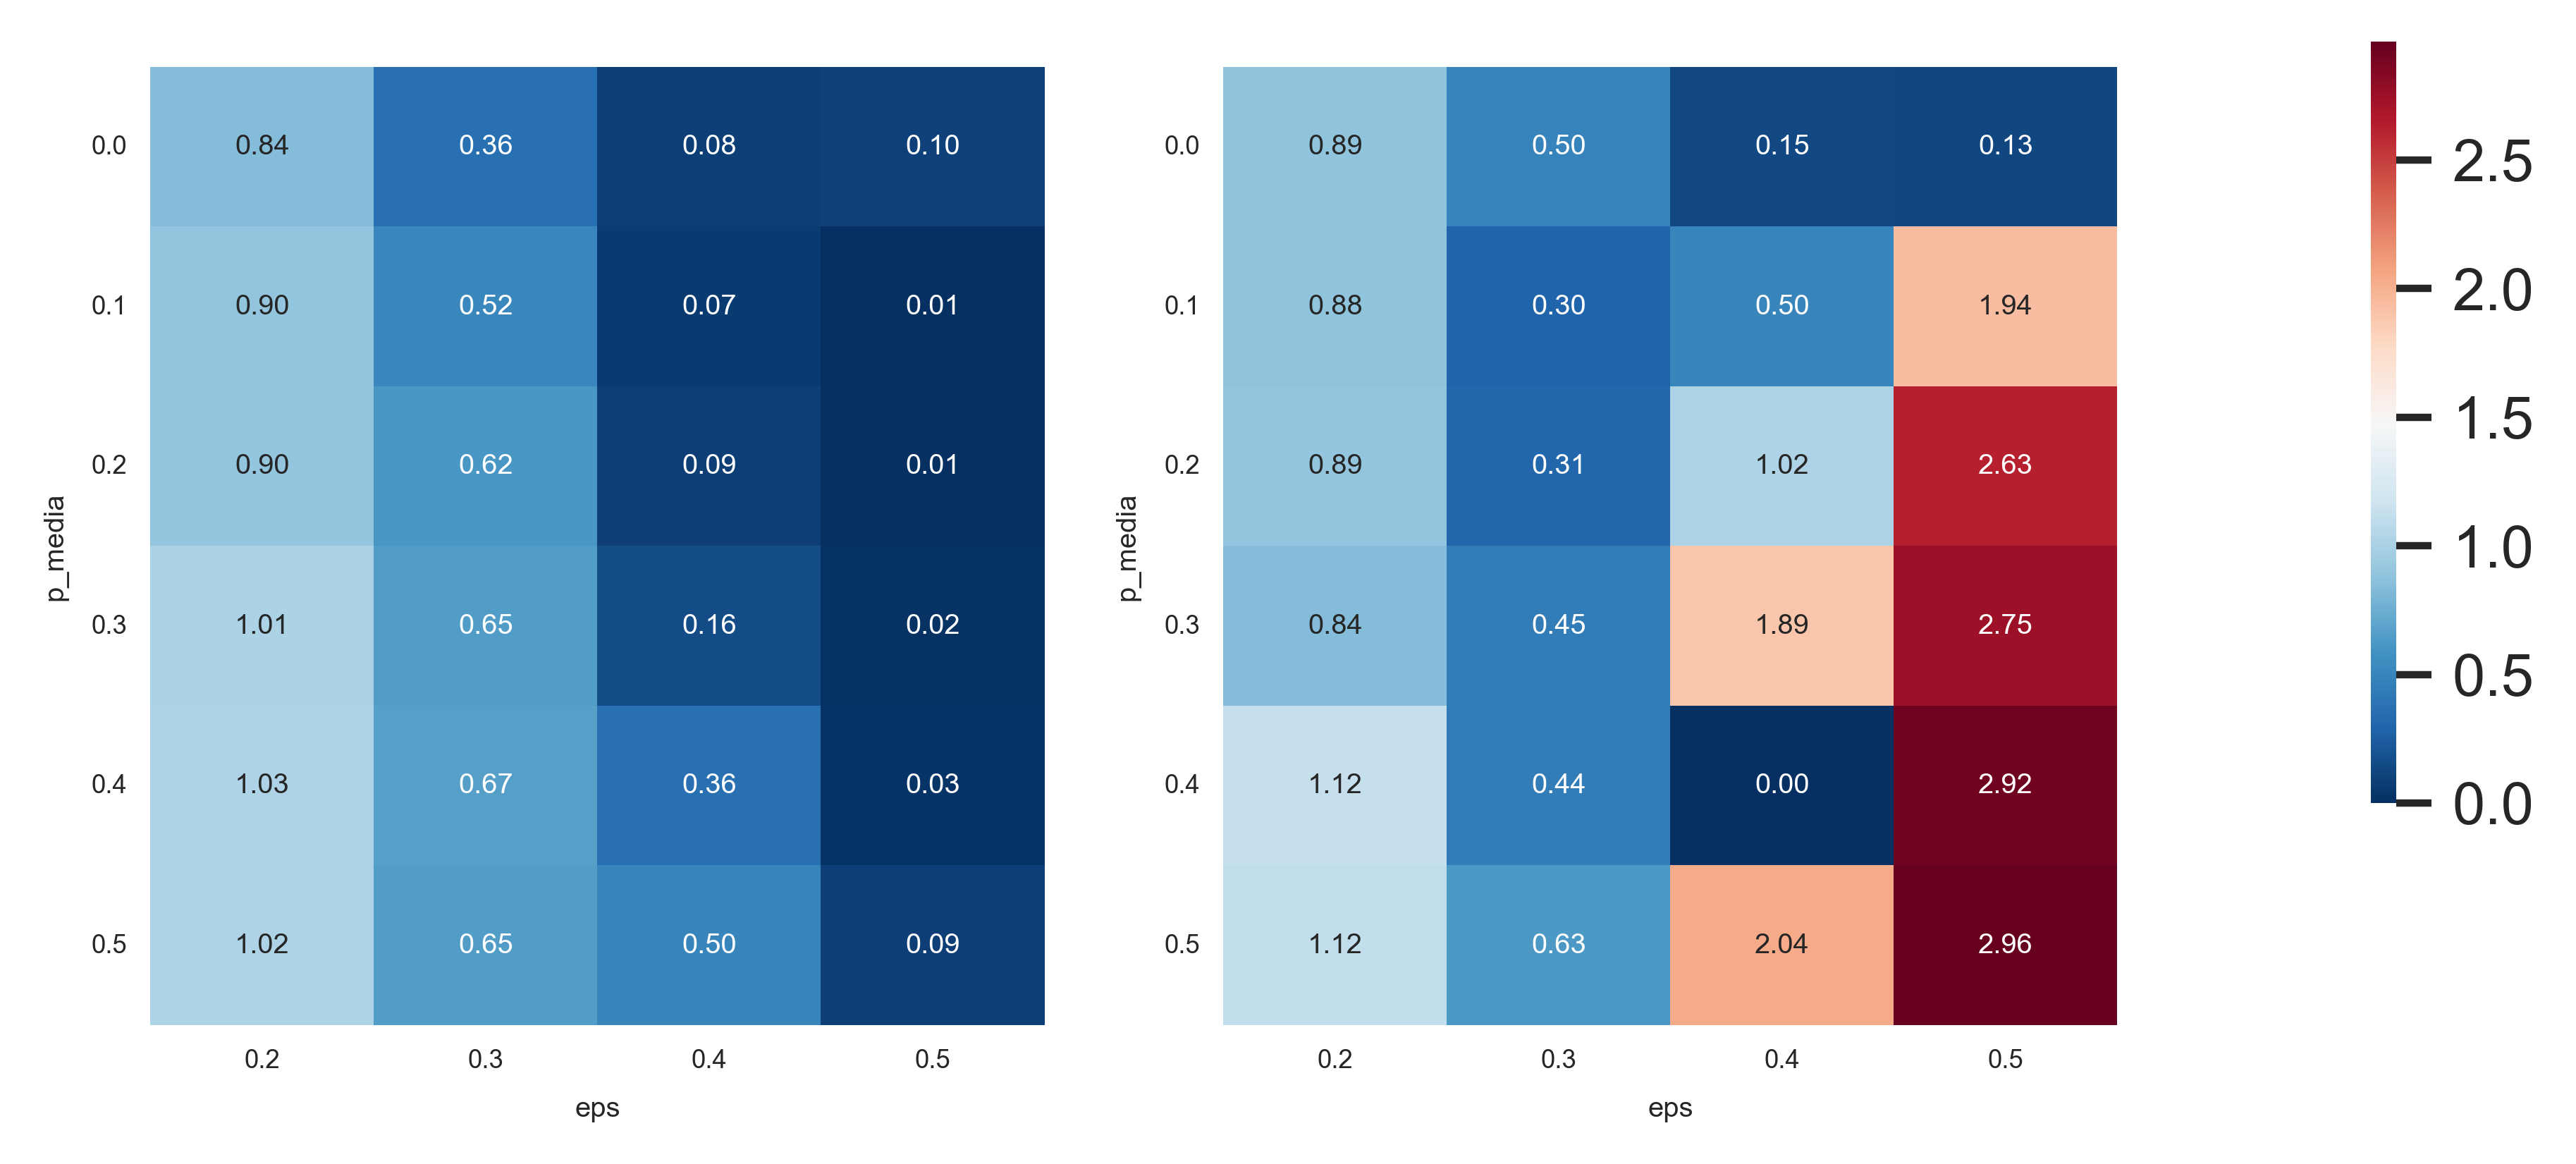

In [15]:
heatmapsplot2(nobias, "new_avg_ncluster", "p_media", "eps", "media_op")
heatmapsplot2(nobias, "10B_avg_entr", "p_media", "eps", "media_op")

 83%|████████▎ | 30/36 [00:51<00:10,  1.71s/it]


FileNotFoundError: [Errno 2] No such file or directory: 'res/media mo[0.05, 0.5, 0.95] p0.5 e0.2 g0.0 gm0.0 mi1000000 nr1.csv'

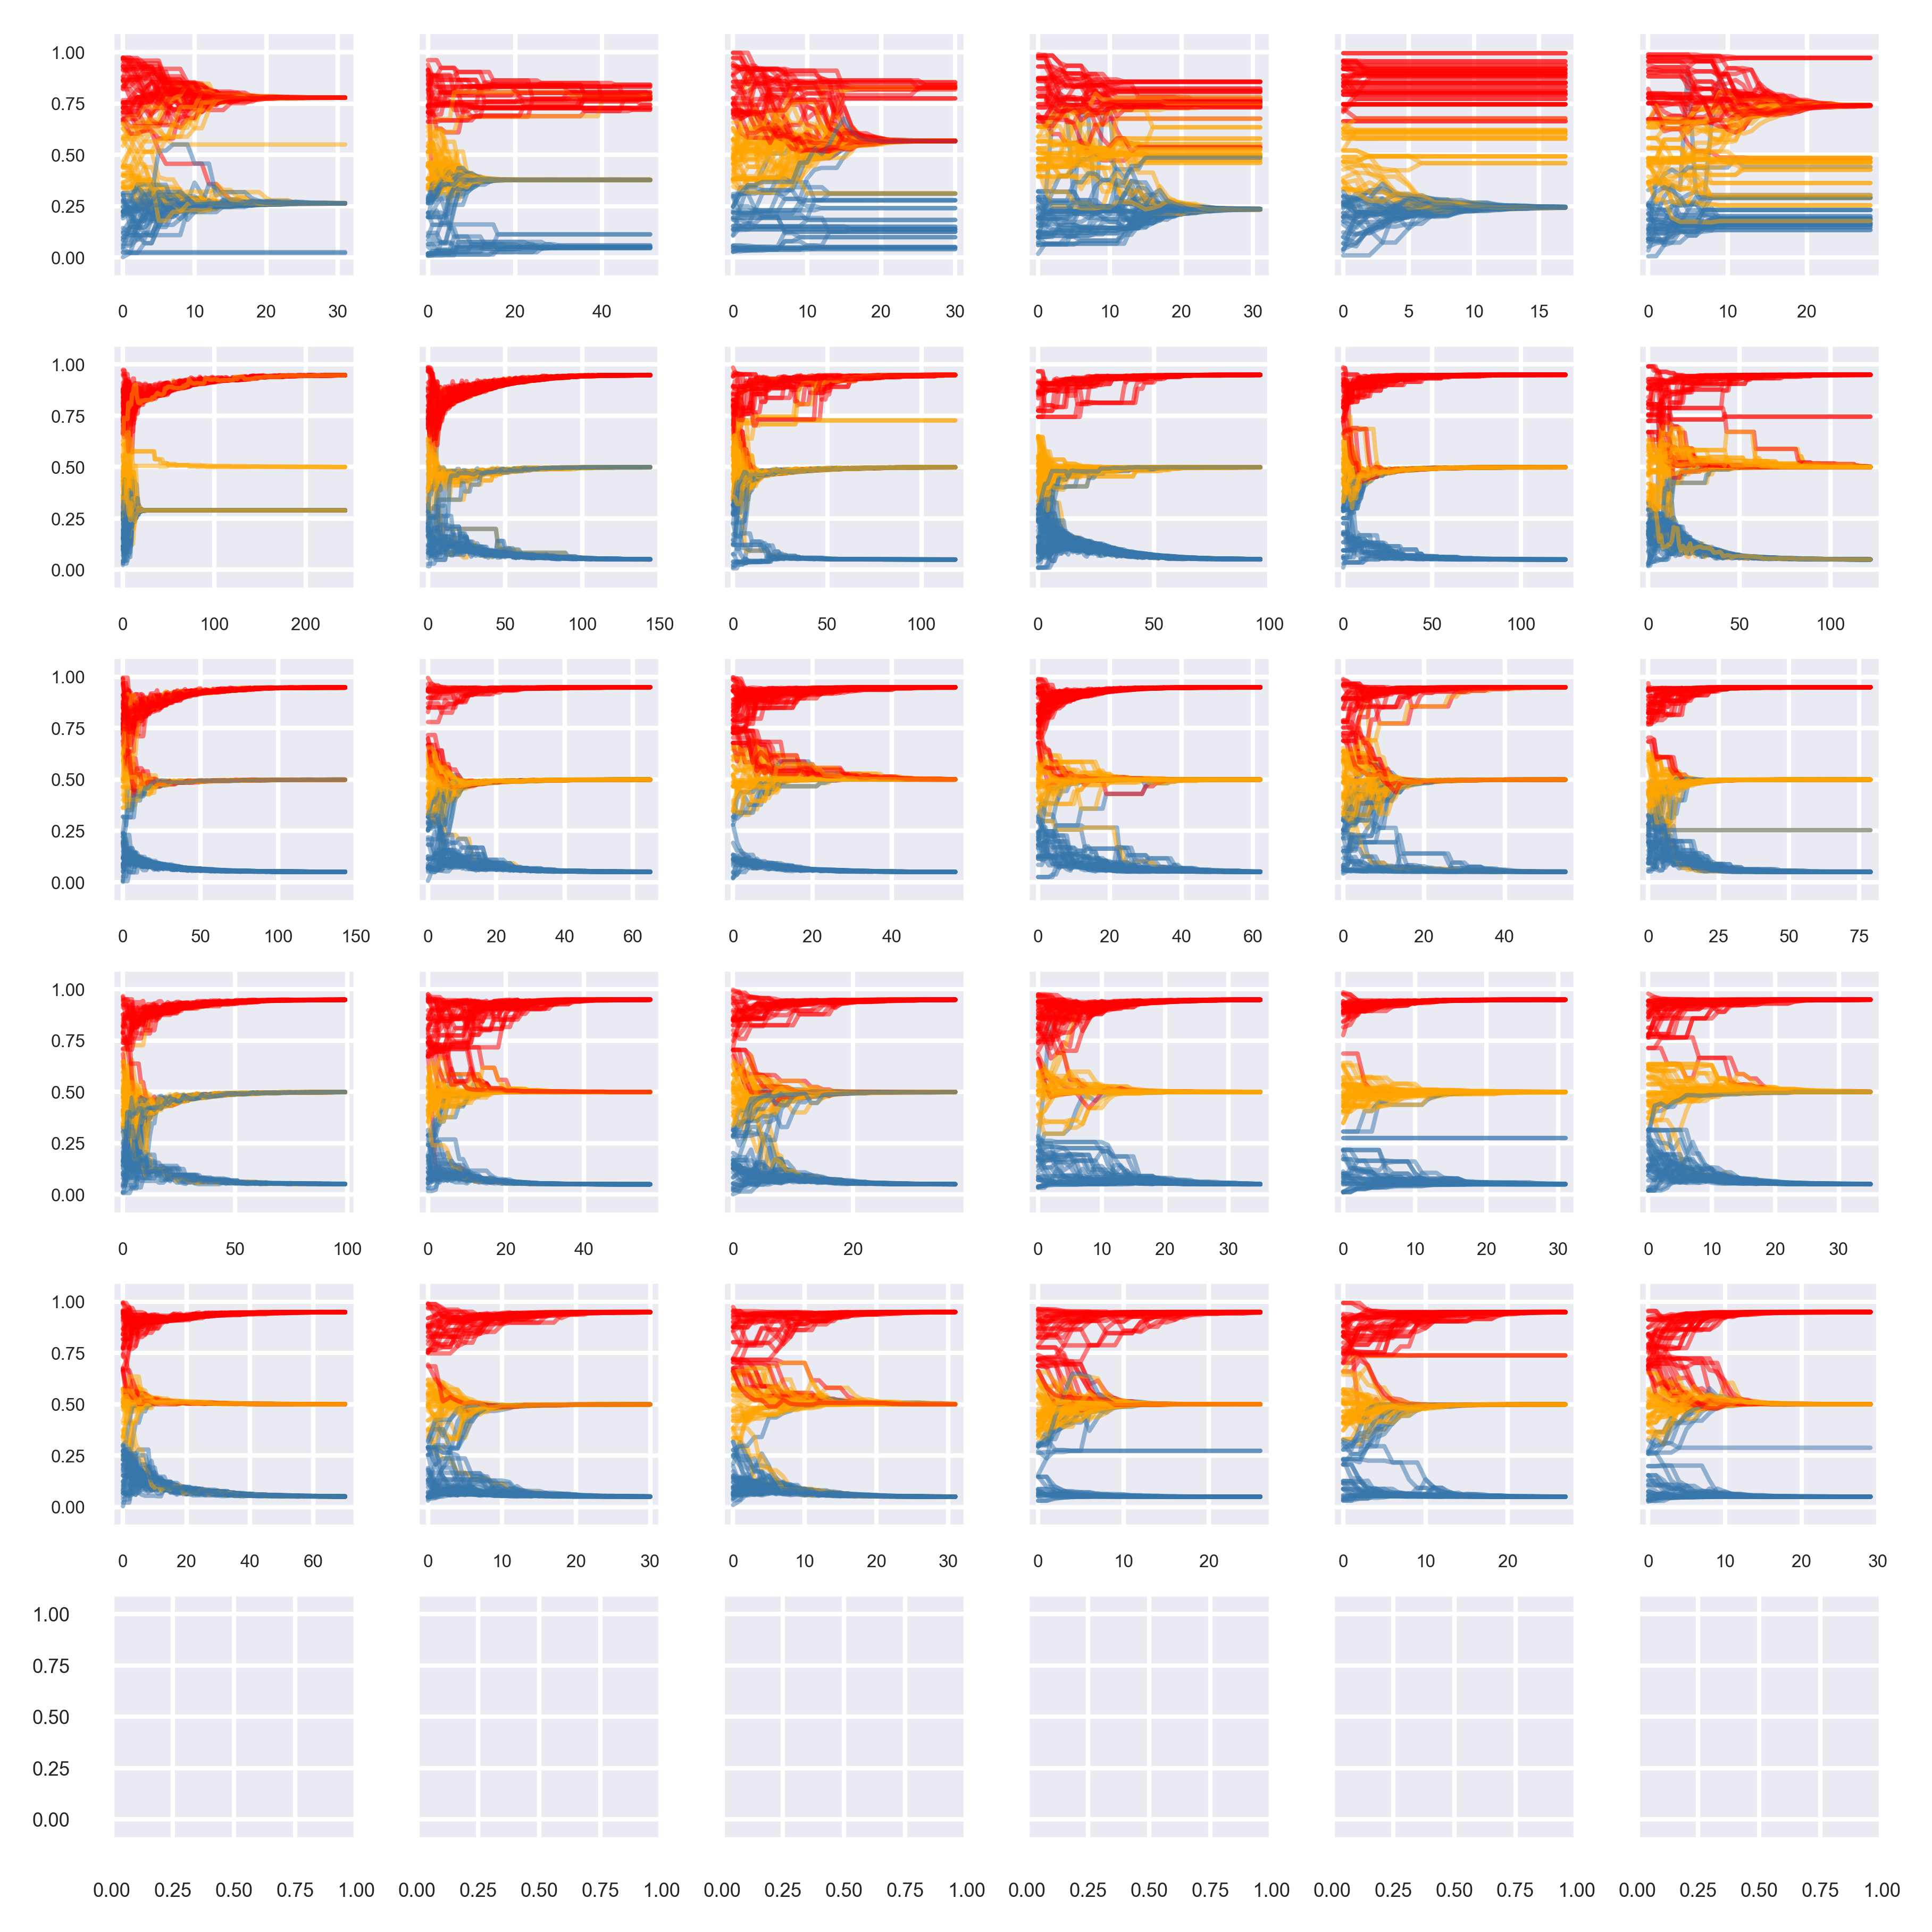

In [16]:
spaghettigridbye('[0.05, 0.5, 0.95]')

In [ ]:
finaldistributiongridbye('[0.0]')